In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import random
#import sklearn
#import collections
#from sklearn.model_selection import train_test_split
#import json
#import pylab 
#from scipy.optimize import curve_fit
from tensorflow.keras import layers, Model
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.patches as mpatches
#import shap
#import pandas as pd
import tensorflow as tf
#import tarfile
from tensorflow.keras.models import load_model
#from qkeras import QActivation, QDense, QConv2D, QBatchNormalization
import ensembler_functions as ef
import tf2onnx
import onnx
import os
from sklearn.model_selection import train_test_split
#import load_and_match as lam

2024-12-20 06:44:34.727439: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 06:44:35.065253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Welcome to JupyROOT 6.30/04


In [2]:
# Set matplotlib default color cycle
new_color_cycle = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22',
    '#17becf',
    '#aec7e8',
    '#ffbb78',
    '#98df8a',
    '#ff9896',
    '#c5b0d5',
    '#c49c94',
    '#f7b6d2',
    '#c7c7c7',
    '#dbdb8d',
    '#9edae5'
]

# You can then apply this new color cycle to your matplotlib plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=new_color_cycle)

In [3]:
L1AD_rate = 1000
target_rate = 10

In [4]:
# First, one should run run_lam.py to generate match L1AD scores to the events, and then set that path
# in ensembler_functions load_and_preprocess

### Main

In [ ]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000,
    "pt_thresholds": [50, 20, 20, 20],
    "comments": "new L1AD model"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_109", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10,
    "training_weights": True
}

datasets, data_info = ef.load_and_preprocess(**data_info)
training_info, data_info = ef.train_multiple_models(datasets, data_info, **training_info)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/ZZ4lep.h5
Lo

In [ ]:
ef.process_multiple_models(
    training_info=training_info,
    data_info=data_info,
    plots_path=training_info['save_path']+'/plots',
    target_rate=target_rate,
    L1AD_rate=L1AD_rate
)

### Test ONNX

In [7]:
training_info = {
    "save_path": "./trained_models/multiple_trainings/trial_2", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10,
    "training_weights": True
}

data_info = {
    "train_data_scheme": 
    "topo2A_train+overlap", 
    "pt_normalization_type": 
    "global_division", 
    "L1AD_rate": 1000
}
model_version=0
ef.convert_to_onnx(training_info=training_info, model_version=model_version, object_type='HLT', save_dir='./trained_models/multiple_trainings/trial_2/onnx')
ef.convert_to_onnx(training_info=training_info, model_version=model_version, object_type='L1', save_dir='./trained_models/multiple_trainings/trial_2/onnx')
datasets, data_info = ef.load_and_preprocess(**data_info)
datasets = ef.compare_tf_with_onnx(datasets=datasets, training_info=training_info, model_version=0, onnx_path='./trained_models/multiple_trainings/trial_2/onnx')

Could not search for non-variable resources. Concrete function internal representation may have changed.
2024-10-30 15:45:26.715362: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-10-30 15:45:26.715559: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2024-10-30 15:45:27.230193: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-10-30 15:45:27.230453: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


ONNX HLT_AE model saved to: ./trained_models/multiple_trainings/trial_2/onnx/HLT_AE_0.onnx


Could not search for non-variable resources. Concrete function internal representation may have changed.
2024-10-30 15:45:29.812788: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-10-30 15:45:29.812992: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2024-10-30 15:45:30.345443: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-10-30 15:45:30.345661: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


ONNX L1_AE model saved to: ./trained_models/multiple_trainings/trial_2/onnx/L1_AE_0.onnx
Loaded A14N23LO from ./h5_ntuples/A14N23LO.h5
Loaded EB from ./h5_ntuples/EB.h5
Loaded EB_test2 from ./h5_ntuples/EB_test2.h5
Loaded EB_train from ./h5_ntuples/EB_train.h5
Loaded HAHMggfZdZd2l2nu from ./h5_ntuples/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from ./h5_ntuples/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from ./h5_ntuples/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from ./h5_ntuples/ZZ4lep.h5
Loaded Zprime2EJs from ./h5_ntuples/Zprime2EJs.h5
Loaded jjJZ1 from ./h5_ntuples/jjJZ1.h5
Loaded jjJZ2 from ./h5_ntuples/jjJZ2.h5
Loaded jjJZ4 from ./h5_ntuples/jjJZ4.h5
Loaded qqa from ./h5_ntuples/qqa.h5


In [8]:
for tag, data_dict in datasets.items():
    print(f'{tag}:')
    for key, value in data_dict.items():
        print(f'    {key}: {value.shape}')

A14N23LO:
    HLT_data: (10000, 48)
    L1_data: (10000, 48)
    passHLT: (10000,)
    passL1: (10000,)
    topo2A_AD_scores: (10000,)
    weights: (10000,)
    L1Seeded: (10000,)
    HLT_model_outputs: (10000, 48)
    L1_model_outputs: (10000, 48)
    HLT_AD_scores: (10000,)
    L1_AD_scores: (10000,)
    ONNX_HLT_model_outputs: (10000, 48)
    ONNX_L1_model_outputs: (10000, 48)
    ONNX_HLT_AD_scores: (10000,)
    ONNX_L1_AD_scores: (10000,)
HAHMggfZdZd2l2nu:
    HLT_data: (70000, 48)
    L1_data: (70000, 48)
    passHLT: (70000,)
    passL1: (70000,)
    topo2A_AD_scores: (70000,)
    weights: (70000,)
    L1Seeded: (70000,)
    HLT_model_outputs: (70000, 48)
    L1_model_outputs: (70000, 48)
    HLT_AD_scores: (70000,)
    L1_AD_scores: (70000,)
    ONNX_HLT_model_outputs: (70000, 48)
    ONNX_L1_model_outputs: (70000, 48)
    ONNX_HLT_AD_scores: (70000,)
    ONNX_L1_AD_scores: (70000,)
HHbbttHadHad:
    HLT_data: (100000, 48)
    L1_data: (100000, 48)
    passHLT: (100000,)
    pa

In [9]:
print(datasets['EB_test']['HLT_AD_scores'][0:5])
print()
print(datasets['EB_test']['ONNX_HLT_AD_scores'][0:5])

[1.62544931 1.92602879 1.33561259 0.         1.06108748]

[1.62544931 1.92602879 1.33561259 0.         1.06108748]


In [ ]:
# Success! These AD scores are the same.

### save raw data, latent reps, AD scores for additional studies

In [5]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000,
    "pt_thresholds": [50, 20, 20, 20],
    "comments": "new L1AD model"
}

training_info = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_109", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10,
    "training_weights": True
}

datasets, data_info = ef.load_and_preprocess(**data_info)
ef.save_datasets_with_AD_scores(datasets, training_info=training_info, save_dir='/eos/home-m/mmcohen/ntuples/dataset_with_AD_scores')

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/ZZ4lep.h5
Lo

In [4]:
def load_subdicts_from_h5(save_dir):
    """
    Loads sub-dictionaries of NumPy arrays from HDF5 files in a directory and reconstructs the original structure.
    
    Args:
        save_dir (str): The directory where the HDF5 files are stored.
    
    Returns:
        main_dict (dict): A dictionary of dictionaries where the innermost values are NumPy arrays.
    """
    main_dict = {}
    
    for filename in os.listdir(save_dir):
        if filename.endswith(".h5"):
            sub_dict_name = os.path.splitext(filename)[0]
            file_path = os.path.join(save_dir, filename)
            with h5py.File(file_path, 'r') as f:
                sub_dict = {key: np.array(f[key]) for key in f}
            main_dict[sub_dict_name] = sub_dict
            print(f"Loaded {sub_dict_name} from {file_path}")
    
    return main_dict

datasets = load_subdicts_from_h5('/eos/home-m/mmcohen/ntuples/dataset_with_AD_scores')
for tag, data_dict in datasets.items():
    print(f'{tag}:')
    for key, value in data_dict.items():
        print(f'    {key}: {value.shape}')

Loaded A14N23LO from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/A14N23LO.h5
Loaded EB_test from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/EB_test.h5
Loaded EB_train from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/EB_train.h5
Loaded EB_val from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/EB_val.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/ZZ4lep.h5
Loaded Zprime2EJs from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/Zprime2EJs.h5
Loaded jjJZ1 from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/jjJZ1.h5
Loaded jjJZ2 from /eos/home-m/mmcohen/ntuples/dataset_with_AD_scores/jjJZ2.h5
Loaded jjJZ4 from /eos/home-m/mmcohen/ntuples/data

### Compare two versions

In [ ]:
# Model 1 ----------------------------------------------------
training_info_1 = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_108", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10, 
    "training_weights": True
}

data_info_1 = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "comments": "new L1AD model"
}
# ------------------------------------------------------------



# Model 2 ----------------------------------------------------
training_info_2 = {
    "save_path": "/eos/home-m/mmcohen/ad_trigger_development/trained_models/trial_104", 
    "dropout_p": 0.1, 
    "L2_reg_coupling": 0.01, 
    "latent_dim": 4, 
    "large_network": True, 
    "num_trainings": 10, 
    "training_weights": True
}

data_info_2 = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [0, 0, 0, 0], 
    "comments": "new L1AD model"
}
# ------------------------------------------------------------

# ef.process_multiple_models(
#     training_info=training_info_1,
#     data_info=data_info_1,
#     plots_path=training_info_1['save_path']+'/plots2',
#     target_rate=target_rate,
#     L1AD_rate=L1AD_rate
# )

ef.process_multiple_models(
    training_info=training_info_2,
    data_info=data_info_2,
    plots_path=training_info_2['save_path']+'/plots2',
    target_rate=target_rate,
    L1AD_rate=L1AD_rate
)

ef.compare_two_models(
    data_info_1 = data_info_1,
    training_info_1 = training_info_1,
    data_info_2 = data_info_2,
    training_info_2=training_info_2,
    plots_path='/eos/home-m/mmcohen/ad_trigger_development/plots/model_comparison_plots_12-13-2024',
    obj_types = ['HLT', 'L1'],
    model_versions = [0, 0],
    trigger_schemes = ['l1Seeded', 'l1Seeded'],
    model_names = ['HLT_50303030', 'L1_0000']
)

powering on... preparing to run evals
Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/12-13-2024/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_m

/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.9852789337229524


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 1...
HLTAD threshold: 6.844510358578567


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.8790928290657174


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 2...
HLTAD threshold: 6.893164829015889


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 3.1887719244707062


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 3...
HLTAD threshold: 6.834687395230393


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.8420957766127004


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 4...
HLTAD threshold: 6.931649792550996


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.735081056497324


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 5...
HLTAD threshold: 6.726861277708962


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 3.147266155969906


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 6...
HLTAD threshold: 6.879568682460212


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.9944461883330464


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 7...
HLTAD threshold: 6.8877234106728


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.9876746795051776


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 8...
HLTAD threshold: 6.853253827626819


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


HLTAD threshold: 2.7592767100199342


/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:191: RuntimeWarning: invalid value encountered in double_scalars
  gain = (combined - hlt) / hlt
/eos/home-i03/m/mmcohen/ad_trigger_development/src/AD_trigger_training/HLTAD/ensembler_functions.py:237: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


phase 1: starting evals of model 9...


### Misc

In [16]:
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000,
    "pt_thresholds": [-10, -10, -10, -10],
    "comments": "new L1AD model"
}

datasets, data_info = ef.load_and_preprocess(**data_info)

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/11-14-2024/ZZ4lep.h5
Lo

In [28]:
idxs = datasets['EB_test']['L1Seeded']
events = datasets['EB_test']['raw_HLT_data'][idxs]
leading_jet_pt = np.reshape(events, newshape=(-1, 16, 3))[:, 0, 0]
weights = datasets['EB_test']['weights'][idxs]
num_zeroed = np.sum((leading_jet_pt != 0) & (leading_jet_pt < 50)) / len(leading_jet_pt)
num_zeroed_weighted = np.sum(((leading_jet_pt != 0) & (leading_jet_pt < 50)) * weights) / np.sum(weights)

print(num_zeroed)
print(num_zeroed_weighted)

0.821569221448046
0.8800088440664284


In [29]:
print(np.sum(leading_jet_pt > 50) / len(leading_jet_pt))

0.15237806725234776


In [47]:
events = datasets['EB_test']['raw_HLT_data']
leading_jet_pt = np.reshape(events, newshape=(-1, 16, 3))[:, 0, 0]
weights = datasets['EB_test']['weights']
num_zeroed = np.sum((leading_jet_pt != 0) & (leading_jet_pt < 50)) / len(leading_jet_pt)
num_zeroed_weighted = np.sum(((leading_jet_pt != 0) & (leading_jet_pt < 50)) * weights) / np.sum(weights)

print(num_zeroed)
print(num_zeroed_weighted)

0.493003492164424
0.5656791574840984


In [57]:
idxs = datasets['EB_test']['L1Seeded']
events = datasets['EB_test']['raw_HLT_data'][idxs]
leading_jet_pt = np.reshape(events, newshape=(-1, 16, 3))[:, 0, 0]
weights = datasets['EB_test']['weights'][idxs]
num_zeroed = np.sum((leading_jet_pt != 0)) / len(leading_jet_pt)
num_zeroed_weighted = np.sum(((leading_jet_pt != 0)) * weights) / np.sum(weights)

print(num_zeroed)
print(num_zeroed_weighted)

0.9739472887003938
0.9999194723423933


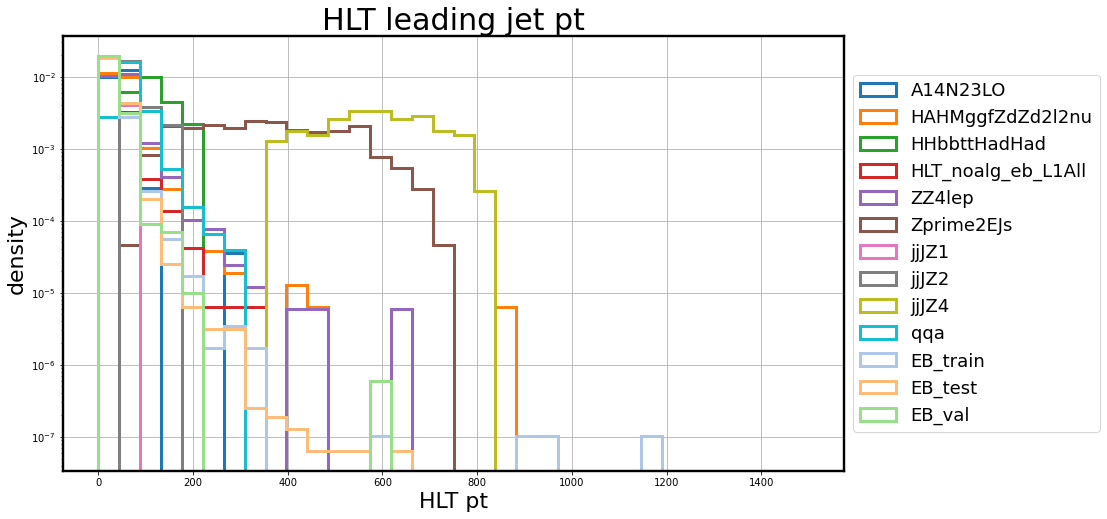

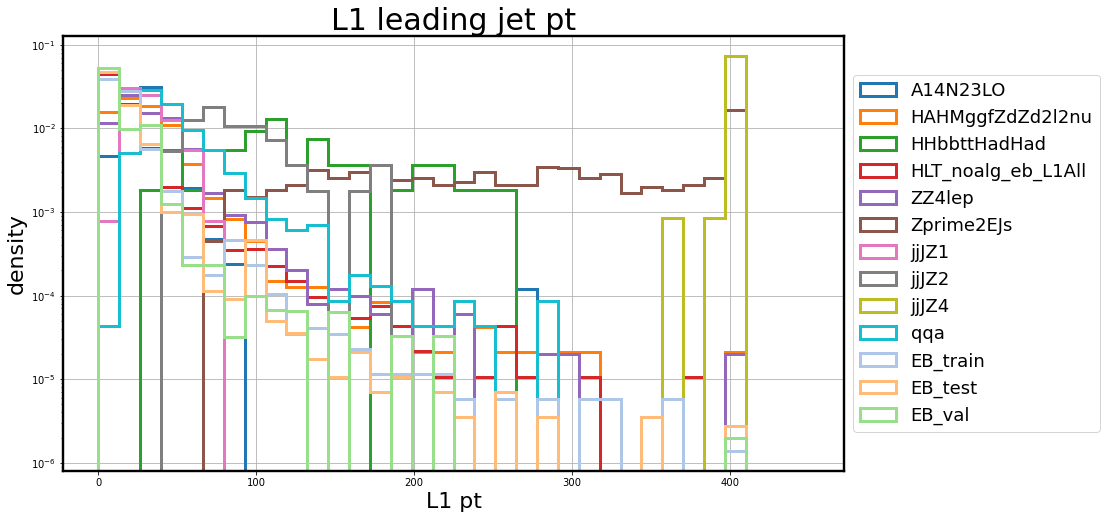

In [36]:
bins = {'HLT': np.linspace(0, 1500, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.rcParams['axes.linewidth'] = 2.4
    plt.figure(figsize=(14, 8))
    for tag, data_dict in datasets.items():
        idxs = data_dict['L1Seeded']
        data = np.reshape(data_dict[f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 0, 0]
        weights = datasets[tag]['weights'][idxs]
        plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} leading jet pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

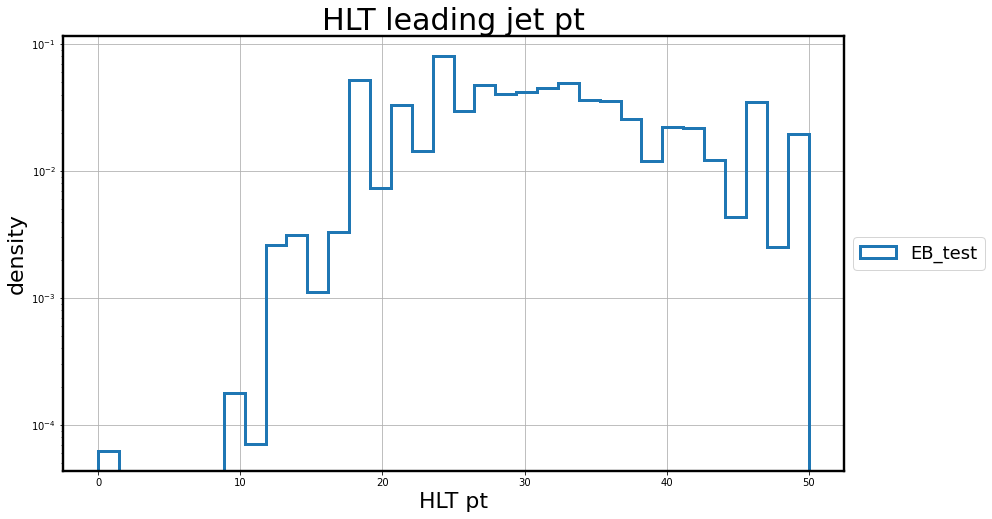

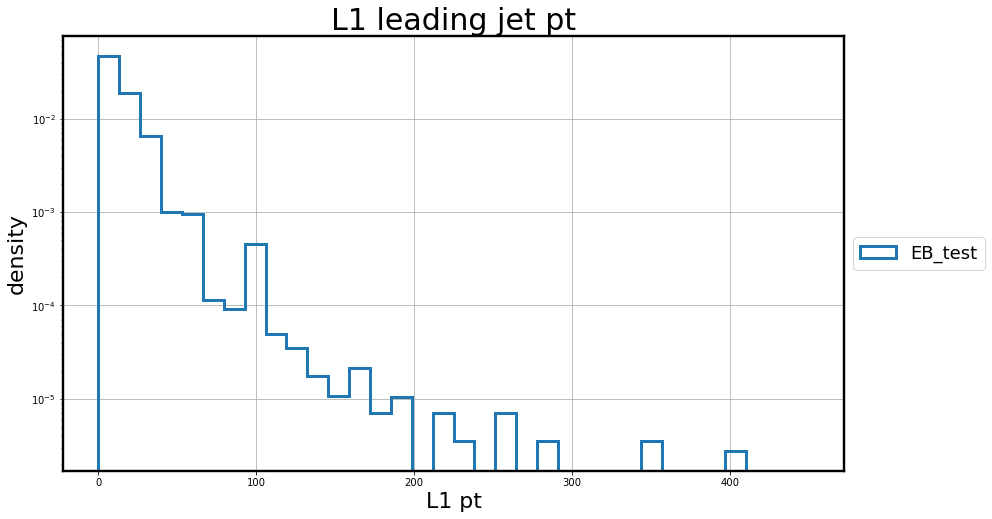

In [54]:
bins = {'HLT': np.linspace(0, 50, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.figure(figsize=(14, 8))
    tag = 'EB_test'
    idxs = datasets[tag]['L1Seeded']
    data = np.reshape(datasets[tag][f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 0, 0]
    weights = datasets[tag]['weights'][idxs]
    plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} leading jet pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

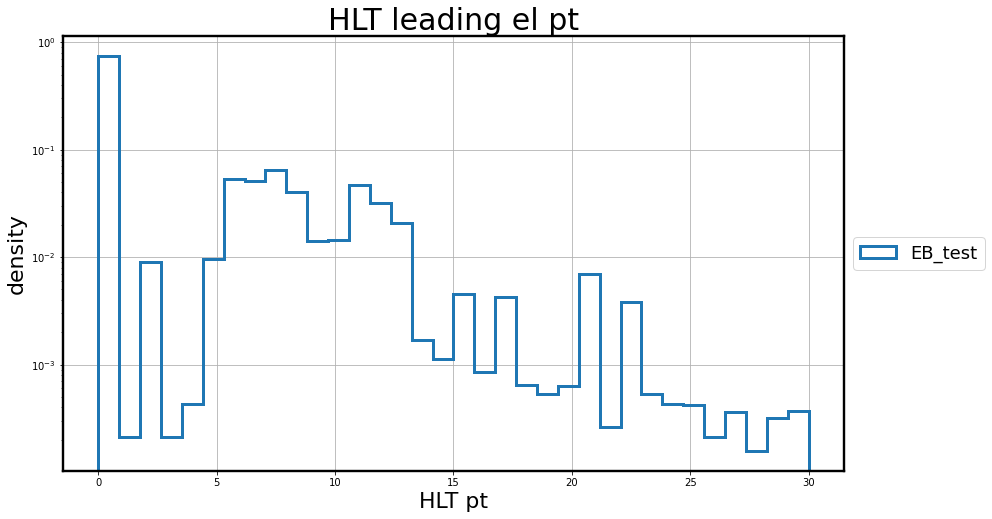

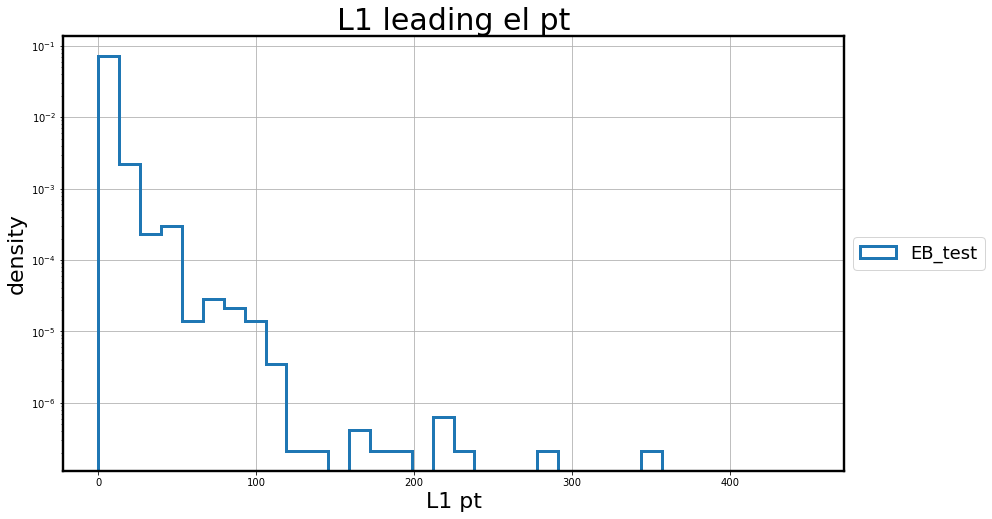

In [52]:
bins = {'HLT': np.linspace(0, 30, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.figure(figsize=(14, 8))
    tag = 'EB_test'
    idxs = datasets[tag]['L1Seeded']
    data = np.reshape(datasets[tag][f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 6, 0]
    weights = datasets[tag]['weights'][idxs]
    plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} leading el pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

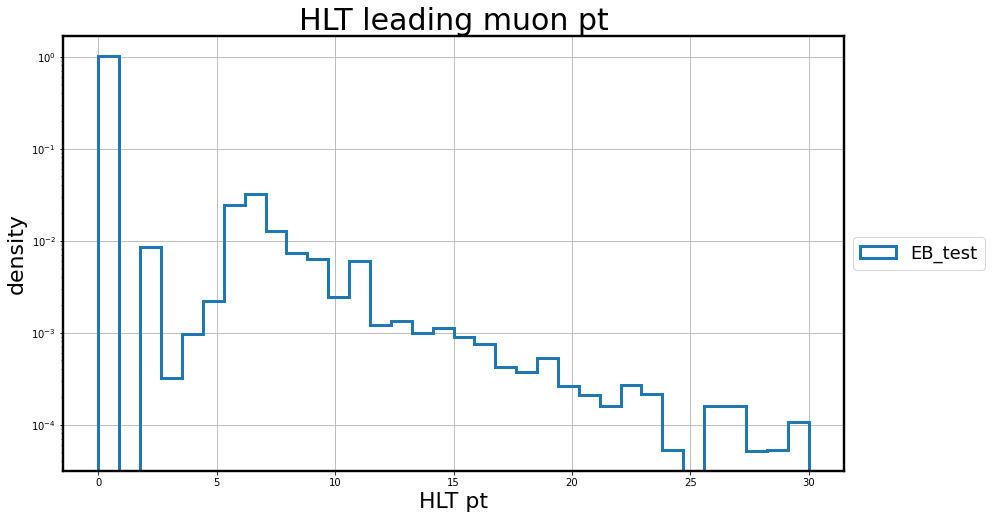

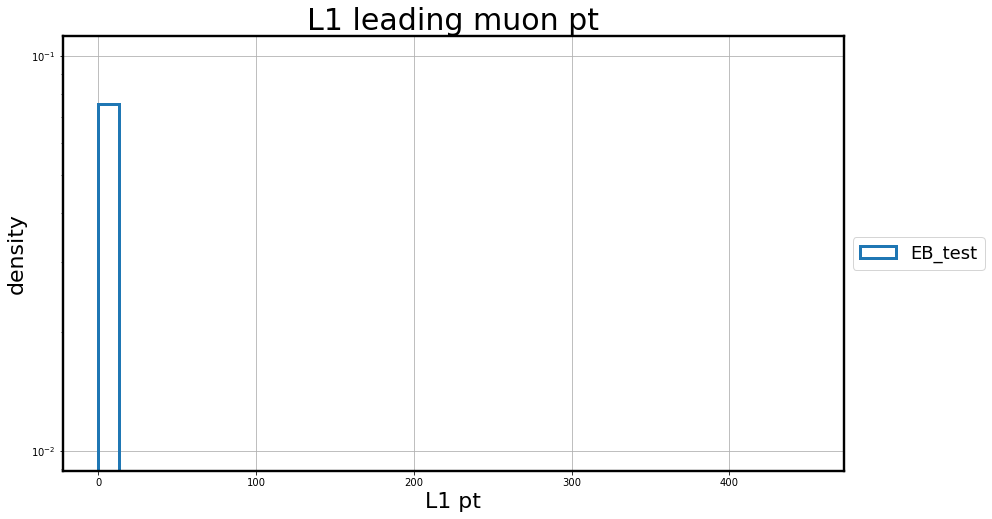

In [51]:
bins = {'HLT': np.linspace(0, 30, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.figure(figsize=(14, 8))
    tag = 'EB_test'
    idxs = datasets[tag]['L1Seeded']
    data = np.reshape(datasets[tag][f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 9, 0]
    weights = datasets[tag]['weights'][idxs]
    plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} leading muon pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

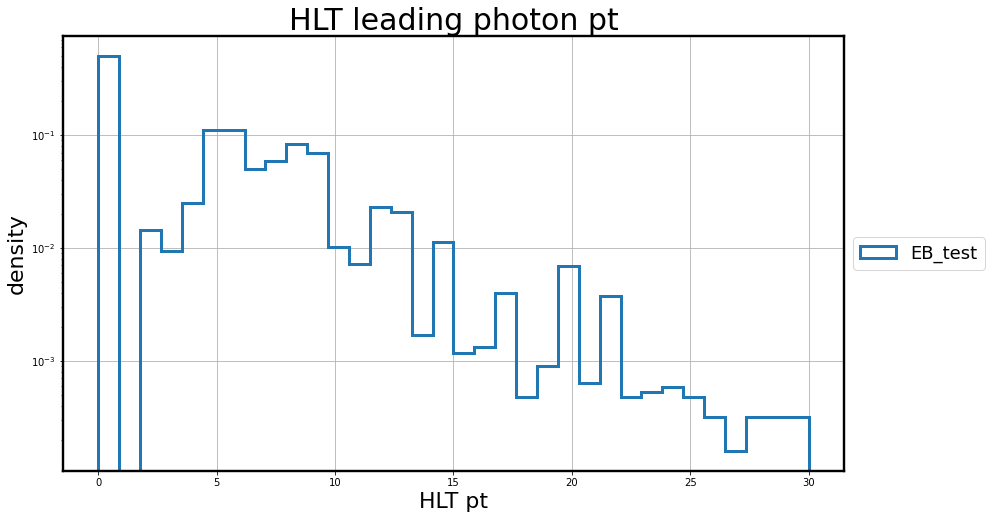

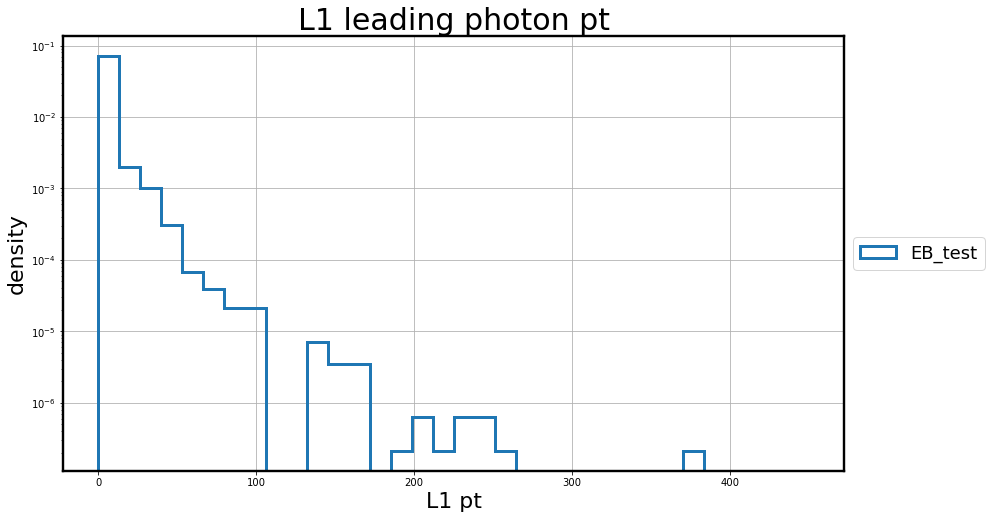

In [49]:
bins = {'HLT': np.linspace(0, 30, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.figure(figsize=(14, 8))
    tag = 'EB_test'
    idxs = datasets[tag]['L1Seeded']
    data = np.reshape(datasets[tag][f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 12, 0]
    weights = datasets[tag]['weights'][idxs]
    plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} leading photon pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

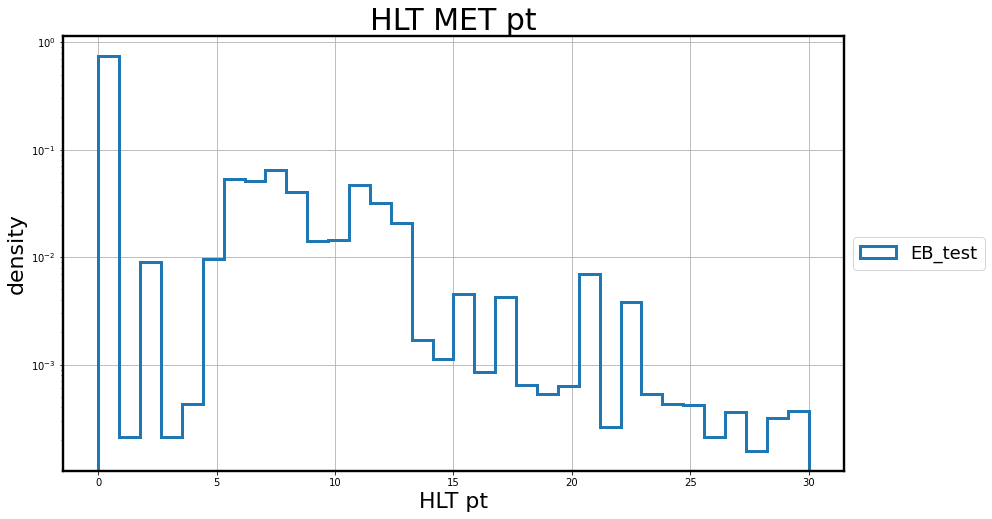

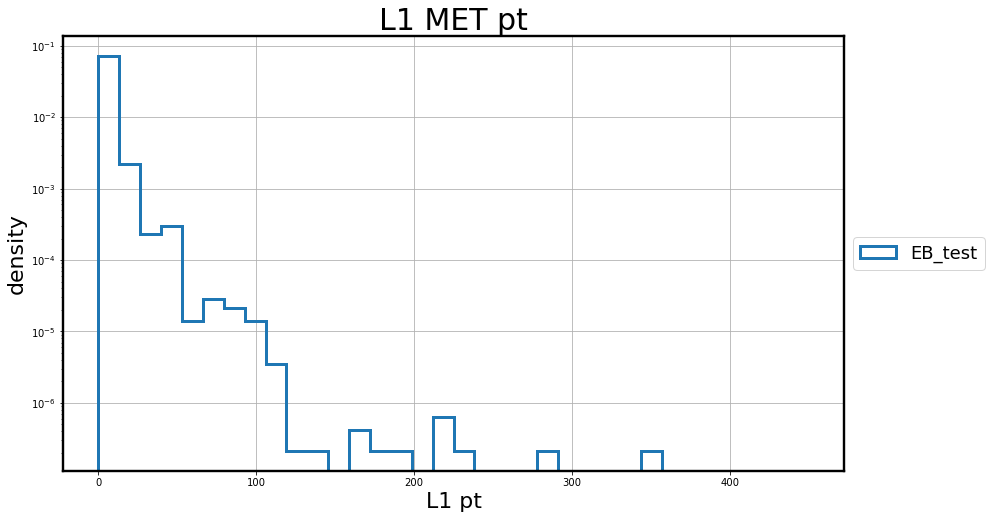

In [50]:
bins = {'HLT': np.linspace(0, 30, 35),
        'L1': np.linspace(0, 450, 35)}
for data_type in ['HLT', 'L1']:
    plt.figure(figsize=(14, 8))
    tag = 'EB_test'
    idxs = datasets[tag]['L1Seeded']
    data = np.reshape(datasets[tag][f'raw_{data_type}_data'], newshape=(-1, 16, 3))[idxs, 6, 0]
    weights = datasets[tag]['weights'][idxs]
    plt.hist(data, bins=bins[data_type], label=tag, histtype='step', density=True, fill=False, linewidth=3, weights=weights)
    
    plt.yscale('log')
    plt.xlabel(f'{data_type} pt', fontsize=22)
    plt.ylabel('density', fontsize=22)
    plt.title(f'{data_type} MET pt', fontsize=30)
    plt.grid()
    plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()